In [25]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
np.seterr(divide='ignore', invalid='ignore');
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('default')
import scipy.stats as stats
from astropy.table import Table, Column, MaskedColumn, join
from tqdm import tqdm
c = 2.998e10
k = 1.38e-16
h = 6.626e-27
plt.rcParams.update({'font.size': 22})
halpha = 6564.61
hbeta = 4862.68
hgamma = 4341.68
hdelta = 4102.89
plt.rcParams['figure.figsize'] = [15, 10]
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
import lmfit
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
import emcee
from lmfit import Model,Minimizer
import corner
import numdifftools
from scipy.ndimage.interpolation import shift
import pickle

In [26]:
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,scale,MinMaxScaler,StandardScaler

In [28]:
arr = pickle.load(open('modelspecs.p','rb'))
modelspectra = arr[0]
teffs = arr[2]
loggs = arr[1]

def v_mse(y_true, y_pred):
    return K.mean((1e5*(y_pred) - 1e5*(y_true) )**2)

def v_perc(y_true,y_pred):
    return K.mean( (K.abs(y_pred-y_true)*100/(K.max(y_true))) )

def labelscaler(array):
    array[:,0] = (array[:,0] - np.min(teffs)) / (np.max(teffs) - np.min(teffs))
    array[:,1] = (array[:,1] - np.min(loggs)) / (np.max(loggs) - np.min(loggs))
    return array

def labelunscaler(array):
    array[:,0] = array[:,0] * 80000
    array[:,1] = array[:,1] * 9.5
    return array

def modelscaler(array):
    return (array - np.min(modelspectra[:,pixel],0)) / ( np.max(modelspectra[:,pixel],0) - np.min(modelspectra[:,pixel],0) )
    
def modelunscaler(array):
    return array * ( np.max(modelspectra[:,pixel],0) - np.min(modelspectra[:,pixel],0) ) + np.min(modelspectra[:,pixel],0)

X = labelscaler(np.stack((teffs,loggs)).transpose())

pixel = 2563



t = modelscaler(modelspectra[:,pixel])


def generator():
    x = Input(shape=(2,))
    y = Dense(10,activation='sigmoid')(x)
    y = Dense(10,activation='sigmoid')(y)
    out = Dense(1,activation='linear')(y)
    
    model = Model(inputs = x, outputs = out)
    model.compile(optimizer = Adamax(lr=0.05), loss = 'mse', \
                  metrics = ['mean_absolute_percentage_error'])
    return model

model = generator()
#model.load_weights('ten_neurons.h5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
None


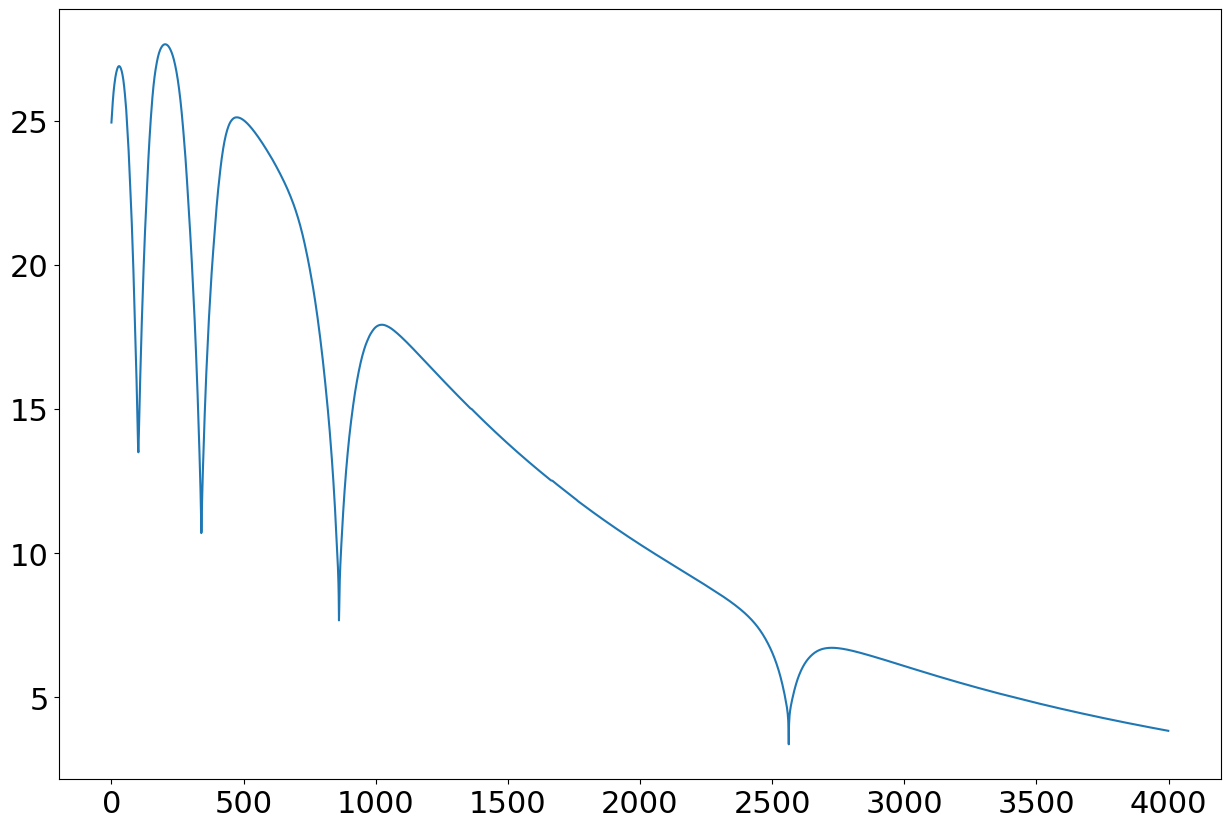

In [47]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
plt.plot( np.ravel(sc.inverse_transform(sc.fit_transform(modelspectra)[0].reshape(1,4000) )))

In [24]:
epoch = 5000
batch = 32

history = model.fit(X,t,epochs=epoch,verbose=2,batch_size=batch)

Epoch 1/5000
 - 0s - loss: 0.0402 - mean_absolute_percentage_error: 100085.5345
Epoch 2/5000
 - 0s - loss: 0.0258 - mean_absolute_percentage_error: 83247.4059
Epoch 3/5000
 - 0s - loss: 0.0128 - mean_absolute_percentage_error: 47863.5357
Epoch 4/5000
 - 0s - loss: 0.0026 - mean_absolute_percentage_error: 43682.3861
Epoch 5/5000
 - 0s - loss: 0.0019 - mean_absolute_percentage_error: 75207.5230
Epoch 6/5000
 - 0s - loss: 0.0016 - mean_absolute_percentage_error: 43444.9494
Epoch 7/5000
 - 0s - loss: 0.0014 - mean_absolute_percentage_error: 59117.9341
Epoch 8/5000
 - 0s - loss: 0.0012 - mean_absolute_percentage_error: 44386.8398
Epoch 9/5000
 - 0s - loss: 0.0012 - mean_absolute_percentage_error: 33123.9410
Epoch 10/5000
 - 0s - loss: 0.0010 - mean_absolute_percentage_error: 48044.5965
Epoch 11/5000
 - 0s - loss: 9.6884e-04 - mean_absolute_percentage_error: 49544.5601
Epoch 12/5000
 - 0s - loss: 8.9563e-04 - mean_absolute_percentage_error: 37787.2171
Epoch 13/5000
 - 0s - loss: 0.0010 - mea

Epoch 100/5000
 - 0s - loss: 4.4297e-05 - mean_absolute_percentage_error: 1490.9078
Epoch 101/5000
 - 0s - loss: 9.0408e-05 - mean_absolute_percentage_error: 3704.6726
Epoch 102/5000
 - 0s - loss: 6.5428e-05 - mean_absolute_percentage_error: 3512.8787
Epoch 103/5000
 - 0s - loss: 4.6117e-05 - mean_absolute_percentage_error: 4261.5131
Epoch 104/5000
 - 0s - loss: 4.0540e-05 - mean_absolute_percentage_error: 2560.7165
Epoch 105/5000
 - 0s - loss: 6.3954e-05 - mean_absolute_percentage_error: 6126.2532
Epoch 106/5000
 - 0s - loss: 7.4145e-05 - mean_absolute_percentage_error: 12452.8332
Epoch 107/5000
 - 0s - loss: 5.0128e-05 - mean_absolute_percentage_error: 3078.6170
Epoch 108/5000
 - 0s - loss: 1.1774e-04 - mean_absolute_percentage_error: 3485.3806
Epoch 109/5000
 - 0s - loss: 5.1386e-05 - mean_absolute_percentage_error: 2468.2982
Epoch 110/5000
 - 0s - loss: 6.2072e-05 - mean_absolute_percentage_error: 669.9989
Epoch 111/5000
 - 0s - loss: 5.8438e-05 - mean_absolute_percentage_error: 49

KeyboardInterrupt: 

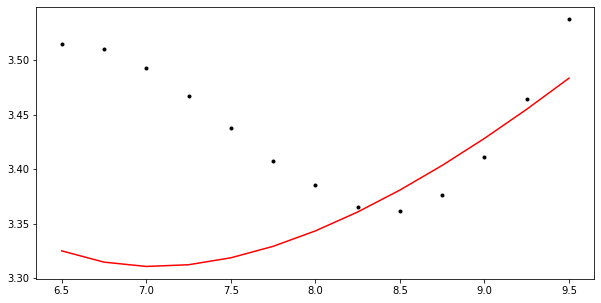

In [21]:
temp = 15000
tmask = (teffs == temp)
ls = np.sort(loggs[tmask])

mods = [];
for i in ls:
    mods.append( modelunscaler(np.ravel(model.predict(labelscaler(np.asarray([temp,i]).reshape(1,-1))))) )
mods = np.asarray(mods)

plt.figure(figsize=(10,5))
plt.plot(ls,mods,'r')
plt.plot(loggs[tmask],modelspectra[:,pixel][tmask],'k.')

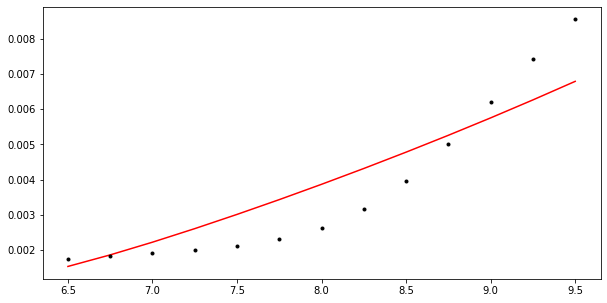

In [22]:
temp = 6000
tmask = (teffs == temp)
ls = np.sort(loggs[tmask])

mods = [];
for i in ls:
    mods.append( np.ravel(model.predict(labelscaler(np.asarray([temp,i]).reshape(1,-1)))) )
mods = np.asarray(mods)

plt.figure(figsize=(10,5))
plt.plot(ls,mods,'r')
plt.plot(loggs[tmask],t[tmask],'k.')